# Preparations

- Mount Google Drive 
- Copy and extract data,
- Checkout or pull to get the latest code from github.

In [44]:
import os, time

colab_data_dir = "/content/data/"
gdrive_workspace = r"/gdrive/My Drive/colab_workspace/advertima/data"

if not os.path.exists(colab_data_dir):
  !mkdir {colab_data_dir}
  print("Data folder created.")

if not os.path.exists("/gdrive"):
  print("Mounting google drive")
  from google.colab import drive
  drive.mount('/gdrive')
print("Google drive is mounted at /gdrive")
  
traindata_prefix = "300W_LP"
traindata_dir = os.path.join(colab_data_dir, traindata_prefix)
testdata_prefix = "AFLW2000"
testdata_dir = os.path.join(colab_data_dir, testdata_prefix)  
  
  
start_time = time.time()
if not os.path.exists(traindata_dir):  
  print("Extracting {}...".format(traindata_prefix))
  !unzip -qq -n {os.path.join(gdrive_workspace, traindata_prefix) + ".zip"} -d  {colab_data_dir}
elapsed_time = time.time() - start_time
print("{} is ready ({:.1f} sec)".format(os.path.join(colab_data_dir, traindata_prefix), elapsed_time))
  
start_time = time.time()
if not os.path.exists(testdata_dir):  
  print("Extracting {}...".format(testdata_prefix)),
  !unzip -qq -n {os.path.join(gdrive_workspace, testdata_prefix) + ".zip"} -d  {colab_data_dir}
elapsed_time = time.time() - start_time
print("{} is ready ({:.1f} sec)".format(os.path.join(colab_data_dir, testdata_prefix), elapsed_time))

!ls {colab_data_dir}

Google drive is mounted at /gdrive
/content/data/300W_LP is ready (0.0 sec)
/content/data/AFLW2000 is ready (0.0 sec)
300W_LP  300W_LP_filenames.txt	AFLW2000  AFLW2000_filenames.txt


**Code from github**

In [63]:
%cd /content
if not os.path.exists("/content/deep-head-pose"):
  # Clone the entire repo.
  !git clone -l -s https://github.com/emredog/deep-head-pose.git deep-head-pose
  %cd deep-head-pose/code
else:
  %cd deep-head-pose/code
  !git pull

/content
/content/deep-head-pose/code
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/emredog/deep-head-pose
   f0b4929..3caab65  master     -> origin/master
Updating f0b4929..3caab65
Fast-forward
 code/train_hopenet.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


**Fetch or generate filenames**

In [47]:
from shutil import copyfile
import utils
       
  

for prefix in [traindata_prefix, testdata_prefix]:
  if not os.path.exists(os.path.join(colab_data_dir, prefix + "_filenames.txt")):
    # check the cache
    if os.path.exists(os.path.join(gdrive_workspace, prefix + "_filenames.txt")):
      copyfile(os.path.join(gdrive_workspace, prefix + "_filenames.txt"), 
               os.path.join(colab_data_dir, prefix + "_filenames.txt"))
    else:
      # generate from scratch
      utils.generate_filenames(os.path.join(colab_data_dir, prefix))
      copyfile(os.path.join(colab_data_dir, prefix + "_filenames.txt"), 
               os.path.join(gdrive_workspace, prefix + "_filenames.txt"))
    

  
print("Filenames files are ready.")
!ls -l {colab_data_dir}

Filenames files are ready.
total 4688
drwxr-xr-x 12 root root    4096 Nov 25  2015 300W_LP
-rw-r--r--  1 root root 4618569 Aug 13 12:21 300W_LP_filenames.txt
drwxr-xr-x  3 root root  135168 Mar 29  2016 AFLW2000
-rw-r--r--  1 root root   39380 Aug 13 12:27 AFLW2000_filenames.txt


# Training Hopenet on 300W_LP
Let's reproduce the training process in the paper





In [86]:
# batch size is 128, see https://github.com/natanielruiz/deep-head-pose/issues/55

filename_list = os.path.join(colab_data_dir, traindata_prefix) + "_filenames.txt"
!python train_hopenet.py --num_epochs 25 --batch_size 128 --lr 10e-5 --dataset Pose_300W_LP --data_dir /content/data --alpha 2 --filename_list {filename_list} --output_string Reproduce_300W_LP_


Loading data.
Ready to train network.
Epoch [1/25], Iter [100/956] Losses: Yaw 149.9581, Pitch 243.0340, Roll 280.5632
Epoch [1/25], Iter [200/956] Losses: Yaw 151.2621, Pitch 330.4539, Roll 263.3455
Epoch [1/25], Iter [300/956] Losses: Yaw 123.7761, Pitch 168.8089, Roll 113.9141
Epoch [1/25], Iter [400/956] Losses: Yaw 61.6274, Pitch 155.9532, Roll 106.6386
Epoch [1/25], Iter [500/956] Losses: Yaw 71.1402, Pitch 145.8450, Roll 139.6960
Epoch [1/25], Iter [600/956] Losses: Yaw 43.7147, Pitch 101.6748, Roll 85.6928
Epoch [1/25], Iter [700/956] Losses: Yaw 33.5460, Pitch 69.5986, Roll 73.6898
Epoch [1/25], Iter [800/956] Losses: Yaw 82.6411, Pitch 52.3413, Roll 65.8989
Epoch [1/25], Iter [900/956] Losses: Yaw 27.0291, Pitch 77.8299, Roll 55.7807
Epoch completed in 1225.8 seconds. Taking snapshot...
Traceback (most recent call last):
  File "train_hopenet.py", line 267, in <module>
    optimizer.step()
  File "/usr/local/lib/python3.6/dist-packages/torch/optim/adam.py", line 101, in step


In [87]:
!ls /content/deep-head-pose/code/output/snapshots/

_epoch_1.pkl  _epoch_3.pkl  lossesReproduce_300W_LP_.pkl
_epoch_2.pkl  losses.pkl    Reproduce_300W_LP__epoch_1.pkl


# Display Losses

957


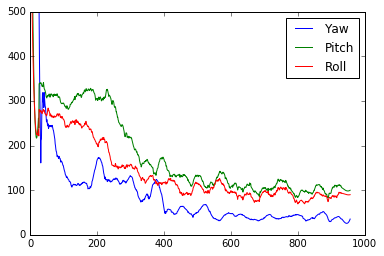

In [90]:
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter # smoothing the curves
plt.style.use('classic')
%matplotlib inline

loss_file = "/content/deep-head-pose/code/output/snapshots/lossesReproduce_300W_LP_.pkl"
with open(loss_file, "rb") as file_handle:
  training_stats = pkl.load(file_handle)
  
print(len(training_stats["loss_yaw"]))

smoothing = lambda x: savgol_filter(x, 51, 3)
plt.plot(smoothing(training_stats["loss_yaw"]), label="Yaw")
plt.plot(smoothing(training_stats["loss_pitch"]), label="Pitch")
plt.plot(smoothing(training_stats["loss_roll"]), label="Roll")
plt.ylim(0, 500)
plt.legend()
            